In [1]:
import pandas as pd
df = pd.read_csv('voice.csv')

In [2]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Part 1: Data exploration**

1. Frequencies are the variables in this dataset,that used to identify a voice as male or female, based on human vocal range i.e., a typical adult male will have a fundamental frequency from 85 to 180 Hz, and a typical adult female from 165 to 255 Hz.
2. Median frequency means the frequency that is found at the exact middle of all recorded frequencies for one voice.
3. Output label determines if the voice is from a male or female.

**Part 2: Data preparation**

In [3]:
x_data = df.iloc[:,:-1]
y_data = df['label']

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_data = scaler.fit_transform(x_data)

label = LabelEncoder()
Y_data = label.fit_transform(y_data)

In [5]:
from sklearn.model_selection import KFold
frequency_folder = KFold(n_splits=10, shuffle=True)

In [6]:
for train_index, test_index in frequency_folder.split(X_data):    
    X_train, X_test = X_data[train_index], X_data[test_index]
    y_train, y_test = Y_data[train_index], Y_data[test_index]
    print("\n")
    print("X_train:", X_train.shape, ", X_test:", X_test.shape)
    print("y_train:", y_train.shape, ", y_test:", y_test.shape)



X_train: (2851, 20) , X_test: (317, 20)
y_train: (2851,) , y_test: (317,)


X_train: (2851, 20) , X_test: (317, 20)
y_train: (2851,) , y_test: (317,)


X_train: (2851, 20) , X_test: (317, 20)
y_train: (2851,) , y_test: (317,)


X_train: (2851, 20) , X_test: (317, 20)
y_train: (2851,) , y_test: (317,)


X_train: (2851, 20) , X_test: (317, 20)
y_train: (2851,) , y_test: (317,)


X_train: (2851, 20) , X_test: (317, 20)
y_train: (2851,) , y_test: (317,)


X_train: (2851, 20) , X_test: (317, 20)
y_train: (2851,) , y_test: (317,)


X_train: (2851, 20) , X_test: (317, 20)
y_train: (2851,) , y_test: (317,)


X_train: (2852, 20) , X_test: (316, 20)
y_train: (2852,) , y_test: (316,)


X_train: (2852, 20) , X_test: (316, 20)
y_train: (2852,) , y_test: (316,)


**Part 3: Model construction**

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors

*1. Logistic Regression*

In [8]:
model_genderlogi = make_pipeline(LogisticRegression(solver='lbfgs', max_iter=1000))

Based on the given data, a sigmoid function will be maked which determine if a voice is from a male(1) or female(0). Logistic Regression shall perform well here, since the voice is either male or female.

*2. Support Vector Machine classifier*

In [9]:
model_gendersvm = make_pipeline(svm.SVC(gamma='scale'))

A Linear SVM Classification with Hard Margin will be used here, which means there is not any "noise" in training data. Decision boundary will place in between two closest data points and the accuracy shall be good.

*3. Decision Tree classifier*

In [10]:
model_genderdecision = make_pipeline(DecisionTreeClassifier())

DecisionTree will divide data until it gets a binary result, which means it may have the best accuracy.

*4. k-Nearest Neighbors classifier*

In [11]:
model_genderknn = make_pipeline(neighbors.KNeighborsClassifier())

KNN does not learn any model, but it uses all nearest neighbors to determine how we classify a given data point. KNN has relatively high accuracy.

**Part 4: Model validation**

In [12]:
from sklearn.model_selection import cross_val_score

model_looping = [model_genderlogi, model_gendersvm, model_genderdecision, model_genderknn]
for model in model_looping:
    score = cross_val_score(model, X_data, Y_data, cv=frequency_folder)
    print(model.steps[0][0],":", score, "\n")

logisticregression : [0.96845426 0.96214511 0.96214511 0.97160883 0.98107256 0.95899054
 0.97476341 0.97476341 0.96835443 0.96518987] 

svc : [0.95899054 0.97160883 0.96214511 0.96214511 0.98107256 0.96529968
 0.97791798 0.9873817  0.97151899 0.97151899] 

decisiontreeclassifier : [0.97791798 0.95899054 0.96214511 0.97160883 0.94952681 0.96529968
 0.97476341 0.94952681 0.97468354 0.95253165] 

kneighborsclassifier : [0.97791798 0.96529968 0.97791798 0.97160883 0.96845426 0.9873817
 0.96845426 0.99053628 0.9778481  0.97468354] 



**Describe what the 'score' means** <br/>
When you run cross_val_score, you cut up the dataset in accordance to the cv value, in our case 10, whereafter you run the model on every single piece. These pieces are then assigned an accuracy score that is then displayed in one big 'score'.

**Describe why the scores are different**<br/>
The difference between the scores in the single model, is because the way the dataset gets cut up into 10 is random, which means the datasets are not always the same every time the function gets run.

**Part 5: Model optimisation: scaling**

In [13]:
new_model_genderlogi = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=1000))
new_model_gendersvm = make_pipeline(StandardScaler(), svm.SVC(gamma='scale'))
new_model_genderdecision = make_pipeline(StandardScaler(), DecisionTreeClassifier())
new_model_genderknn = make_pipeline(StandardScaler(), neighbors.KNeighborsClassifier())

**Describe what scaling actually is** <br/>
Scaling is the practice of standardizing the data so that the models don't end up functioning improperly, due to wild fluctuations in input.

In [14]:
import numpy as np

new_model_looping = [new_model_genderlogi, new_model_gendersvm, new_model_genderdecision, new_model_genderknn]
for model in new_model_looping:
    score = cross_val_score(model, X_data, Y_data, cv=frequency_folder)
    print(model.steps[1][0], ":", np.mean(score))

logisticregression : 0.9728596813480813
svc : 0.9816964820508725
decisiontreeclassifier : 0.9668540111009065
kneighborsclassifier : 0.9747494309787165


**Describe which model performed well, and whether this aligned with your expectation from part 3** <br/>
While all of the models performed well, the model with the biggest mean accuracy was the Support Vector Machine, and the model we assumed would perform the best was DecisionTree. However, we also assumed that Support Vector Machine would do well, so it's not too bad.

**Part 6: Manual Hyperparameter Tuning**

In [15]:
Knn_folder = KFold(n_splits=10, shuffle=True, random_state=42)
for train_knn, test_knn in Knn_folder.split(X_data):    
    Xk_train, Xk_test = X_data[train_knn], X_data[test_knn]
    yk_train, yk_test = Y_data[train_knn], Y_data[test_knn]

In [16]:
from sklearn.metrics import accuracy_score

Knn_1 = neighbors.KNeighborsClassifier(n_neighbors=1)
Knn_1.fit(Xk_train, yk_train)
y_pred = Knn_1.predict(Xk_test)
print('k = 1,', 'Score:', accuracy_score(yk_test, y_pred))

k = 1, Score: 0.9841772151898734


In [17]:
Knn_3 = neighbors.KNeighborsClassifier(n_neighbors=3)
Knn_3.fit(Xk_train, yk_train)
y_pred = Knn_3.predict(Xk_test)
print('k = 3,', 'Score:', accuracy_score(yk_test, y_pred))

k = 3, Score: 0.9873417721518988


In [18]:
Knn_5 = neighbors.KNeighborsClassifier(n_neighbors=5)
Knn_5.fit(Xk_train, yk_train)
y_pred = Knn_5.predict(Xk_test)
print('k = 5,', 'Score:', accuracy_score(yk_test, y_pred))

k = 5, Score: 0.9778481012658228


In [19]:
Knn_7 = neighbors.KNeighborsClassifier(n_neighbors=7)
Knn_7.fit(Xk_train, yk_train)
y_pred = Knn_7.predict(Xk_test)
print('k = 7,', 'Score:', accuracy_score(yk_test, y_pred))

k = 7, Score: 0.9778481012658228


In [20]:
Knn_9 = neighbors.KNeighborsClassifier(n_neighbors=9)
Knn_9.fit(Xk_train, yk_train)
y_pred = Knn_9.predict(Xk_test)
print('k = 9,', 'Score:', accuracy_score(yk_test, y_pred))

k = 9, Score: 0.9778481012658228


In [21]:
Knn_11 = neighbors.KNeighborsClassifier(n_neighbors=11)
Knn_11.fit(Xk_train, yk_train)
y_pred = Knn_11.predict(Xk_test)
print('k = 11,', 'Score:', accuracy_score(yk_test, y_pred))

k = 11, Score: 0.9841772151898734


In [22]:
Knn_13 = neighbors.KNeighborsClassifier(n_neighbors=13)
Knn_13.fit(Xk_train, yk_train)
y_pred = Knn_13.predict(Xk_test)
print('k = 13,', 'Score:', accuracy_score(yk_test, y_pred))

k = 13, Score: 0.9746835443037974


In [23]:
Knn_15 = neighbors.KNeighborsClassifier(n_neighbors=15)
Knn_15.fit(Xk_train, yk_train)
y_pred = Knn_15.predict(Xk_test)
print('k = 15,', 'Score:', accuracy_score(yk_test, y_pred))

k = 15, Score: 0.9715189873417721


In [24]:
Knn_17 = neighbors.KNeighborsClassifier(n_neighbors=17)
Knn_17.fit(Xk_train, yk_train)
y_pred = Knn_17.predict(Xk_test)
print('k = 17,', 'Score:', accuracy_score(yk_test, y_pred))

k = 17, Score: 0.9715189873417721


In [25]:
Knn_19 = neighbors.KNeighborsClassifier(n_neighbors=19)
Knn_19.fit(Xk_train, yk_train)
y_pred = Knn_19.predict(Xk_test)
print('k = 19,', 'Score:', accuracy_score(yk_test, y_pred))

k = 19, Score: 0.9715189873417721


In [26]:
k_List = list(range(1,20))
Odd_k = list(filter(lambda x: x % 2, k_List))
scores = []

for k in Odd_k:
    Knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    Knn.fit(Xk_train, yk_train)
    y_pred = Knn.predict(Xk_test)
    scores.append(accuracy_score(yk_test, y_pred))

print('Mean:', np.mean(scores))

Mean: 0.9778481012658228


Text(0, 0.5, 'Accuracy score')

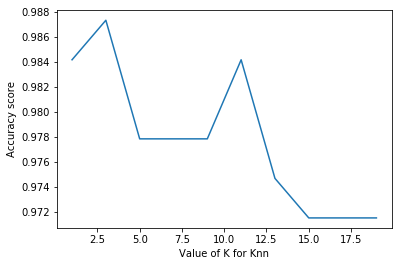

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Odd_k, scores)
plt.xlabel('Value of K for Knn')
plt.ylabel('Accuracy score')

**Why the value you found for n_neighbors -- for the highest score -- has that value** <br/>
The values that gives us the highest score out of our hyperparameters is 3 in this run, since the KFold is randomized, each run would give different results. The hyperparameter determines the amount of datapoints nearby for an accurate result. We assume that 3 are the best because accuracy score is the highest. 